In [2]:
# analyizes weights and biases throughout the training cycle and performs statistics on training history

import numpy as np                   # advanced math library

import torch 
import torch.nn as nn
import torchvision
from torchsummary import summary

import os
import sys

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

os.chdir('/home/niccolo/Desktop/Research/EEE515_project1/pytorch')
assert os.getcwd() == '/home/niccolo/Desktop/Research/EEE515_project1/pytorch'

In [3]:
# Type out model history folder in "history_dir" 
# Get E,N from external .json file/training file?

E = 5
N = 1
# ACC_TH = 0.95

In [4]:
#######################################################
# EXTRACT WEIGHTS AND BIAS VALUES FROM TRAINED MODELS #
#######################################################

# Go to history folder defined by variable: history_dir
os.chdir('/home/niccolo/Desktop/Research/EEE515_project1/pytorch')
from model import model
os.chdir('./history')
history_dir = '2021-12-01 22:56' 
os.chdir(history_dir)

# Iterate through models and extract weights in first layer, then move on to other layer types
epoch_num = 5 #E//N
tot_layer_num = 44 

W = {i:[[] for j in range(tot_layer_num)] for i in range(epoch_num)}
B = {i:[[] for j in range(tot_layer_num)] for i in range(epoch_num)}

verbose = False

j = 0
for file in sorted(os.listdir('.')):
    model_name = file
    print('\n\nMODEL NAME:   ', file)
    checkpoint = torch.load(file)
    model.load_state_dict(checkpoint['model_state_dict'])

    ## Store Weights for jth network in W dictionary
    for i in range(tot_layer_num):
        if i >= 37:
            layer = model.classifier[i-37]
        else:
            layer = model.features[i]

        if isinstance(layer, nn.Conv2d):
            w = layer.weight.data.detach().cpu().numpy()
            b = layer.bias.data.detach().cpu().numpy()
            if verbose:
                print("Layer number: ", i+1)
                print("\tLayer is Conv2d")
                print("\t\tW shape: ", w.shape)
                print("\t\tB shape: ", b.shape)
                print("\t\tin channels: ", layer.in_channels)
                print("\t\tout channels: ", layer.out_channels)
                print("\t\tkernel size: ", layer.kernel_size)
                print('\n')

            W[j][i].append(w)
            B[j][i].append(b)

            # print("i = ", i)
            # print("j =  ", j)

        elif isinstance(layer, nn.Linear):
            w = layer.weight.data.detach().cpu().numpy()
            b = layer.bias.data.detach().cpu().numpy()

            if verbose:
                print("Layer number: ", i+1)
                print("\tLayer is Linear")          
                print("\t\tW shape: ", w.shape)
                print("\t\tB shape: ", b.shape)
                print('\n')

            W[j][i].append(w)
            B[j][i].append(b)
            
            # print("i = ", i)
            # print("j =  ", j)
            
        else:
            if verbose:
                print("Layer number: ", i+1)
                print("\tThis layer has no trainable params\n")
            
            # print("i = ", i)
            # print("j =  ", j)
            



    j += 1

print("FINISHED")



MODEL NAME:    epoch_00.pth


MODEL NAME:    epoch_01.pth


MODEL NAME:    epoch_02.pth


MODEL NAME:    epoch_03.pth


MODEL NAME:    epoch_04.pth
FINISHED


W_layer_shape: (5, 4096, 4096)
B_layer_shape (5, 4096) 


This will take a couple of minutes


Processing epoch_num: 0
Processing epoch_num: 1
Processing epoch_num: 2
Processing epoch_num: 3
Processing epoch_num: 4


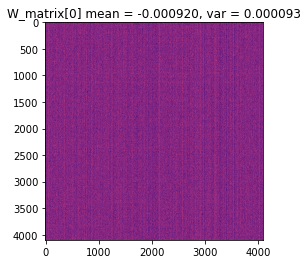

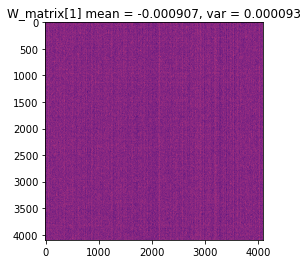

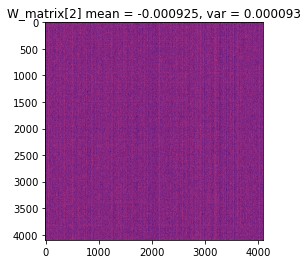

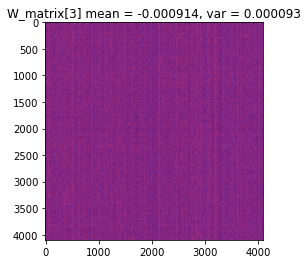

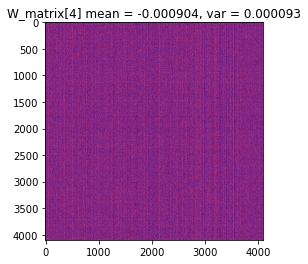

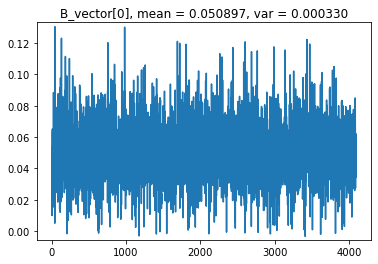

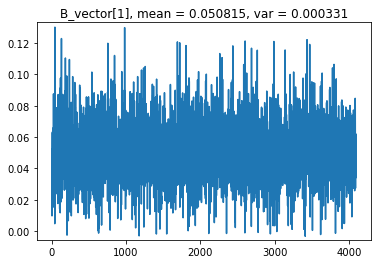

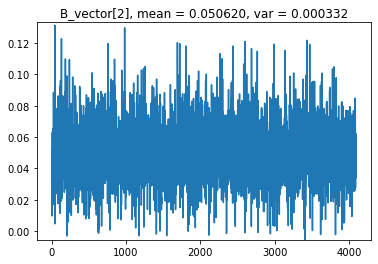

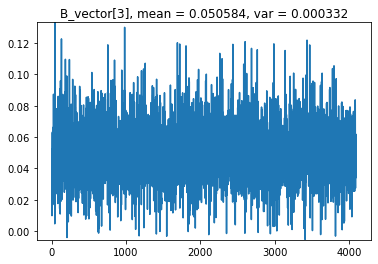

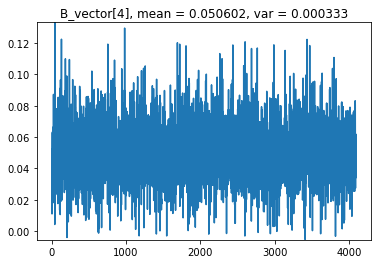

In [5]:
###########################
# GRAPH WEIGHT / BIAS MAP # 
###########################

# colormap info: https://matplotlib.org/stable/tutorials/colors/colormaps.html

layer = 40 # change to look at shape

W_layer = np.squeeze(np.asarray([W[i][layer] for i in range(len(W))]))
B_layer = np.squeeze(np.asarray([B[i][layer] for i in range(len(B))]))

print("W_layer_shape:",W_layer.shape)
print("B_layer_shape",B_layer.shape,'\n\n')
print("This will take a couple of minutes\n\n")


# cmap tested: binary, magma, bone, gray
def plot_W(w_matrix, enhance=False, cmap = 'binary'):
    
    if enhance:
        mult = 5
    else:
        mult = 1

    for k in range(len(w_matrix)):
        print("Processing epoch_num:", k)
        #print("w_matrix dimensions:", w_matrix[k].shape)

        f1,ax1 = plt.subplots()
        ax1.set_title('%s[%i] mean = %f, var = %f' 
                      % ('W_matrix',k,np.mean(w_matrix[k]), np.var(w_matrix[k])))
        ax1.imshow(w_matrix[k]*mult, 
                   cmap, 
                   vmin = min(w_matrix.flatten()), 
                   vmax = max(w_matrix.flatten()))
      

def plot_B(b_vector):


    for k in range(len(b_vector)):
    
        f1,ax1 = plt.subplots()
        ax1.set_title('B_vector[%i], mean = %f, var = %f' 
                      % (k,np.mean(b_vector[k]), np.var(b_vector[k])))
        ax1.plot(b_vector[k])
        ax1.set_ylim([min(b_vector.flatten()), max(b_vector.flatten())])


plot_W(W_layer, enhance=True, cmap='magma')  
plot_B(B_layer)

This will take a couple of minutes...
vmin, vmax = 0.0 0.0008428593864664435
Processing epoch_num: 0
vmin, vmax = -0.059478085 0.050905332
Processing epoch_num: 1
vmin, vmax = -0.05941273 0.052350186
Processing epoch_num: 2
vmin, vmax = -0.059255533 0.05140686
Processing epoch_num: 3
vmin, vmax = -0.059141904 0.05106104
Processing epoch_num: 4
vmin, vmax = -0.059004106 0.050902758


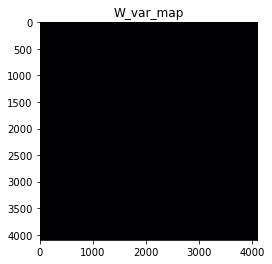

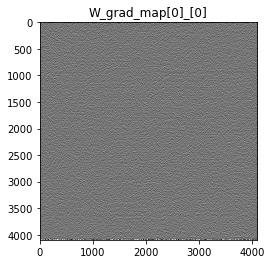

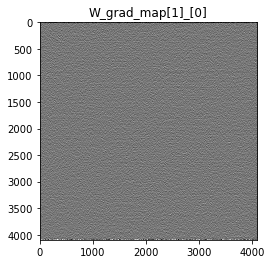

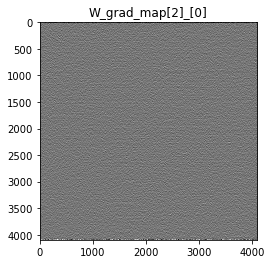

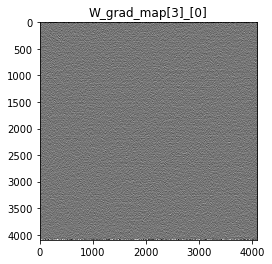

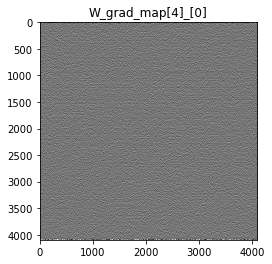

In [6]:
##############################
# GRAPH MEAN / VARIANCE MAPS # 
##############################

# TODO: when you have longer training history,
#       write windowed mean and variance series of graphs 
#       using the following functions

def plot_W_mean(w, enhance=False, cmap = 'binary'):

    w_mean_map = np.zeros((w.shape[1], w.shape[2]))
 
    if enhance:
        mult = 5
    else:
        mult = 1   
 
    for j in range(w.shape[1]):
        print("Processing epoch_num:", k)
        for k in range(w.shape[2]):
            w_mean_map[j,k] = np.mean(w[:,j,k])
    
    f1,ax1 = plt.subplots()
    ax1.set_title('w_mean_map')
    ax1.imshow(w_mean_map*mult, cmap, 
               vmin = min(w_mean_map.flatten()), 
               vmax = max(w_mean_map.flatten()))
    
    
def plot_W_var(w, enhance=False, cmap = 'binary'):  

    w_var_map = np.zeros((w.shape[1], w.shape[2]))

    if enhance:
        mult = 5
    else:
        mult = 1 
    
    for j in range(w.shape[1]):
        for k in range(w.shape[2]):
            w_var_map[j,k] = np.var(w[:,j,k])
    
    f1,ax1 = plt.subplots()
    ax1.set_title('W_var_map')
    ax1.imshow(w_var_map*mult, cmap, 
               vmin = min(w_var_map.flatten()), 
               vmax = max(w_var_map.flatten()))
    print('vmin, vmax =', min(w_var_map.flatten()), max(w_var_map.flatten()))

def plot_W_grad(w, x_or_y, enhance=False, cmap = 'binary'):  
    w_grad_map = np.zeros((w.shape[1], w.shape[2]))
    
    if enhance:
        mult = 100
    else:
        mult = 1 
    
    for j in range(len(w)):
        print("Processing epoch_num:", j)
        w_grad_map = np.gradient(w[j])[x_or_y] # TODO: understand if (0,1) correspond to derivatives in (x,y)
        f1,ax1 = plt.subplots()
        ax1.set_title('W_grad_map[%i]_[%i]' % (j,x_or_y))
        ax1.imshow(w_grad_map*mult, cmap, 
                    vmin = min(np.asarray(w_grad_map).flatten()), # TODO: store series in memory in order to plot max/min values appropriately
                    vmax = max(np.asarray(w_grad_map).flatten()))
        print('vmin, vmax =',min(np.asarray(w_grad_map).flatten()), max(np.asarray(w_grad_map).flatten()))


print("This will take a couple of minutes...")
plot_W_var(W_layer, enhance=True, cmap='magma')
plot_W_grad(W_layer, 0, enhance=True)